# **Ex1 - Unsupervised learning**

## Names and IDs

1.   
2. 

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [909]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random



## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [910]:
# load the data
data = pd.read_csv("customer_segmentation.csv")

# Preprocess data - Drop ID before using it 
data = data.drop(columns=['ID'])

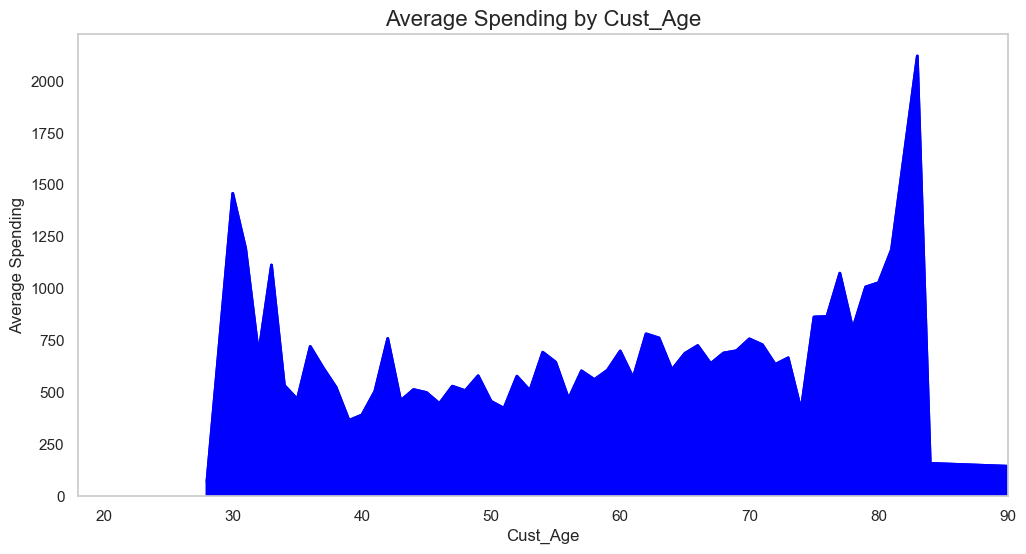

In [911]:
# Graph 3 -
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Add Age infered by 'Year_Birth' column
data['Cust_Age'] = 2024 - data['Year_Birth']

# Group data by age and calculate average total spending
data['Total_Spending'] = data[product_columns].sum(axis=1)
age_spending = data.groupby('Cust_Age')['Total_Spending'].mean()

# Plot age distribution vs. spending
plt.figure(figsize=(12, 6))
age_spending.plot(kind='area', color='blue', linewidth=2)
plt.title('Average Spending by Cust_Age', fontsize=16)
plt.xlabel('Cust_Age', fontsize=12)
plt.xlim(18, 90)  # Focus on relevant age range
plt.ylabel('Average Spending', fontsize=12)
plt.grid()
plt.show()


### Insight:
From this graph we can infer that the most spending ages group are below 30, and above 80.
Those age groups will buy more.

/var/folders/s2/fsqwyg8x4kdgv9j5zt1vgy3r0000gn/T/ipykernel_14236/491772351.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_spending = data.groupby(age_bins).agg({col: 'mean' for col in product_columns}).reset_index()


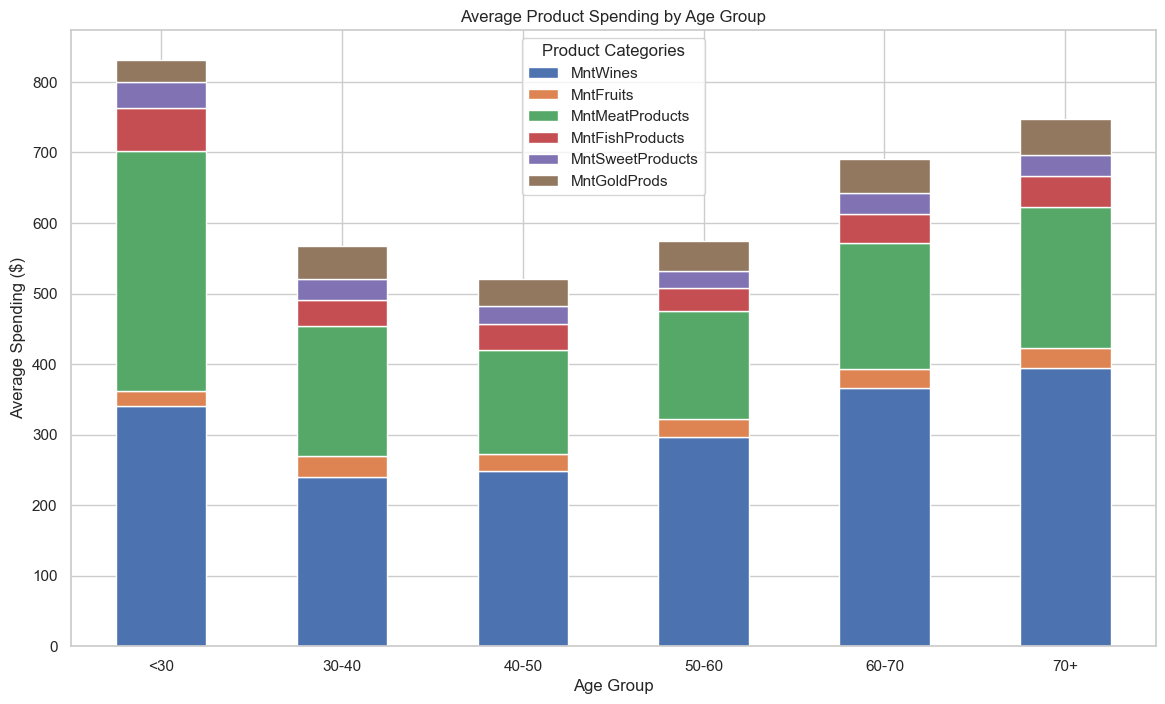

In [912]:
# Graph 2 :
# Correctly defining product columns if not already defined

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculating age from 'Year_Birth'
data['Age'] = 2024 - data['Year_Birth']

# Grouping data by age group and calculating average spending in each product category
age_bins = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 70, 100], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
age_product_spending = data.groupby(age_bins).agg({col: 'mean' for col in product_columns}).reset_index()

# Creating the stacked bar chart again
fig, ax = plt.subplots(figsize=(14, 8))
age_product_spending.set_index('Age').plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Average Product Spending by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Spending ($)')
ax.legend(title="Product Categories")
plt.xticks(rotation=0)  
plt.show()


### Insight -
Showing average product spending per category, by age of each customer.
The most selling categories are Meat and Alcohol products(Winery).

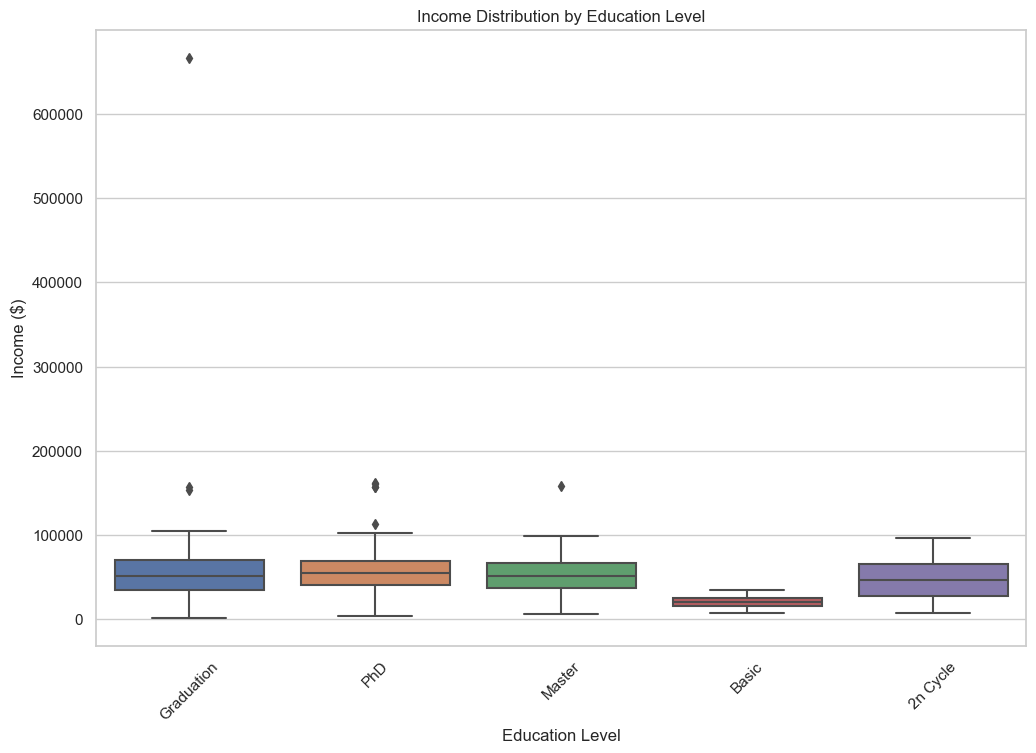

In [913]:
# Graph 3 -
## Income distribution by education level ,including medians. 
## The diamond shapes, are extreme points and doesn't should be included.

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='Income', data=data)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income ($)')
plt.xticks(rotation=45)  
plt.show()


### Insight -
This graph represents the income distribution by education level of customers.
From this graph we can infer that the PHD,Master education are profiting more, though the graudation level is more wide. (we can put attention to the unique most profiting customer that is located in graduation group).
and Basic with no high education, are profiting much less than everyone.

## 2. KMEANS (30 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).
* Note: There are some missing values. Describe how do you handle such.










In [914]:
# load the data
data = pd.read_csv('customer_segmentation.csv')



In [915]:
# Scale the data using MinMaxScaler
# BUT FIRST, handle MISSING values. Min/Max scaler cant work with Null values.
imputer = SimpleImputer(strategy="median")
# We chose the median, because it will not harm the total result at all.
data["Income"] = imputer.fit_transform(data[["Income"]])

# Re-scale the data
scaler = MinMaxScaler()
scaled_features = data.copy()
scaled_columns = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 'NumWebVisitsMonth']
scaled_features[scaled_columns] = scaler.fit_transform(scaled_features[scaled_columns])


# Encode categorical variables
encoded_features = scaled_features.copy()
categorical_columns = ['Education', 'Marital_Status']
encoder = LabelEncoder()
for column in categorical_columns:
    encoded_features[column] = encoder.fit_transform(encoded_features[column])


# Final data
all_features = encoded_features.select_dtypes(include=[np.number])  # Select numerical columns



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


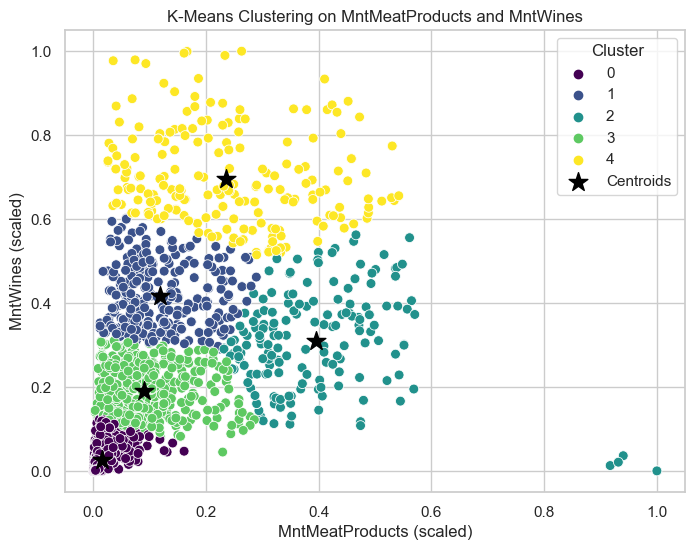

In [916]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
cluster_data = encoded_features[['MntMeatProducts', 'MntWines']].copy()
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(cluster_data)
cluster_data['Cluster'] = clusters


# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_data, x='MntMeatProducts', y='MntWines', hue='Cluster', palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='*', s=200, label='Centroids')
plt.title('K-Means Clustering on MntMeatProducts and MntWines')
plt.xlabel('MntMeatProducts (scaled)')
plt.ylabel('MntWines (scaled)')
plt.legend(title='Cluster')
plt.show()

### Elbow

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

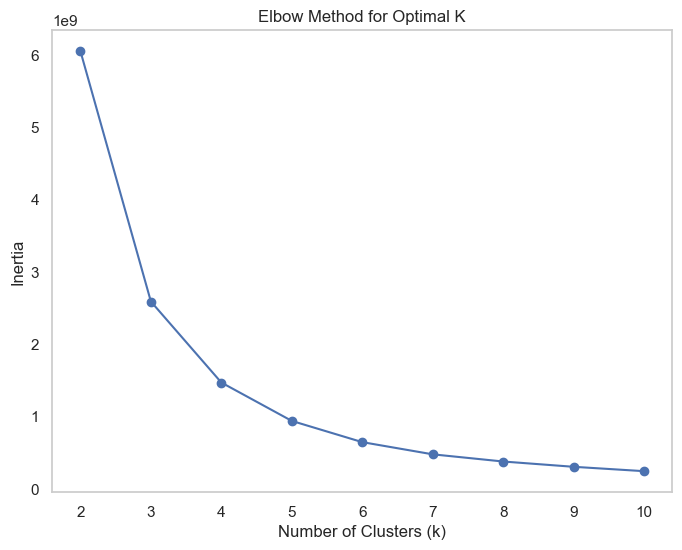

In [ ]:
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans_all = KMeans(n_clusters=k)
    kmeans_all.fit(all_features)
    sse.append(kmeans_all.inertia_)
    silhouette_scores.append(silhouette_score(all_features, kmeans_all.labels_))

# Visualize Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

### Elbow Graph Results
The "elbow" point occurs at k = 4, making it the best choice for the number of clusters based on this graph.
So according to the graph we will choose k=4.

### Silhouette Score

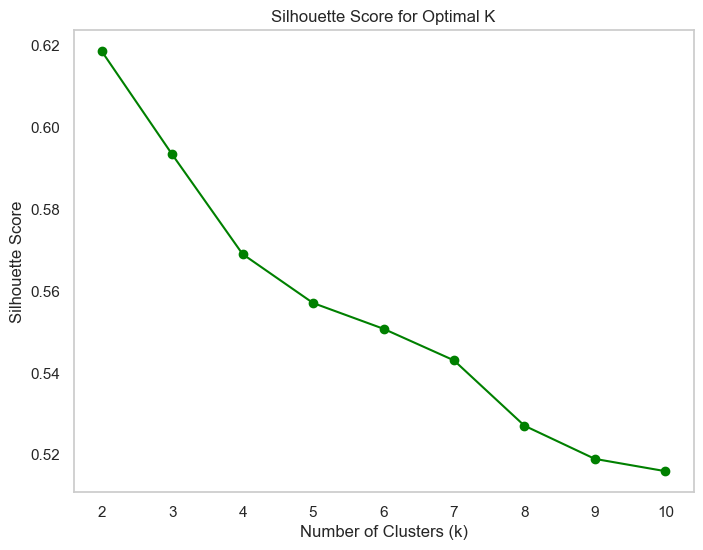

In [918]:
# Visualize Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid()
plt.show()

### Silhouette Score Graph Results
The graph shows the Silhouette Score for different numbers of clusters (k) in K-Means.
As can be seen in the graph, the score is highest at k = 2, indicating the best cluster separation occurs with 2 clusters.
As k increases beyond 2, the Silhouette Score gradually decreases, showing weaker cluster separation.
The decline suggests that adding more clusters leads to overlapping or less distinct groups.
Therefore according to the graph, the best k is k = 2, as it provides the highest score and optimal clustering.


## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





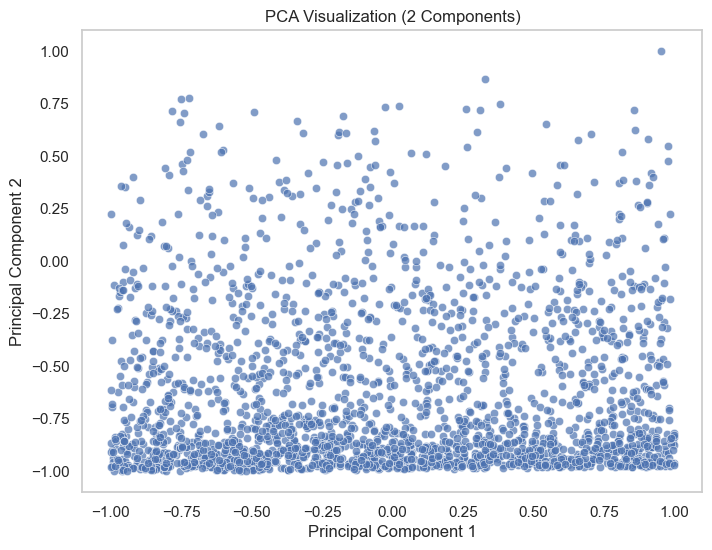

  Principal Component  Explained Variance Ratio
0                 PC1                  0.999131
1                 PC2                  0.000530


In [919]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_features)
pca_dataframe = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Normalize PCA results to [-1, 1] range for visualization
pca_dataframe['Principal Component 1'] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(pca_dataframe[['Principal Component 1']])
pca_dataframe['Principal Component 2'] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(pca_dataframe[['Principal Component 2']])

# Step 2: Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_dataframe,
    x='Principal Component 1',
    y='Principal Component 2',
    alpha=0.7
)
plt.title('PCA Visualization (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Step 3: Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2'],
    'Explained Variance Ratio': explained_variance_ratio
})
print(explained_variance_df)

# 

**Q**: What is the variance explained in the 2 component PCA?

**A**:
the explained variance for PC1 is 0.9991, and for PC2 is 0.00005

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

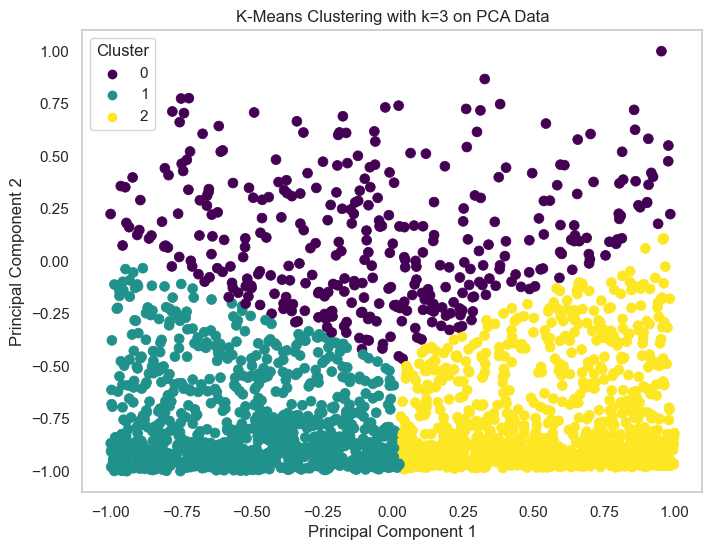

In [ ]:
# Step 1: PCA with n_components = 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_features)
pca_dataframe = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Normalize PCA results to [-1, 1] range for visualization
pca_dataframe['Principal Component 1'] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(pca_dataframe[['Principal Component 1']])
pca_dataframe['Principal Component 2'] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(pca_dataframe[['Principal Component 2']])

# Step 2: Find the Best k for K-Means
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_dataframe)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_dataframe, kmeans.labels_))



# Step 3: Apply K-Means with the Best k (e.g., k = 2 based on silhouette score)
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
pca_dataframe['Cluster'] = kmeans_best.fit_predict(pca_dataframe)

# Step 4: Visualize the K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_dataframe,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    palette='viridis',
    s=50,
    edgecolor=None
)

# Plotting the Best Clusters
plt.title(f'K-Means Clustering with k={best_k} on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

### Elbow

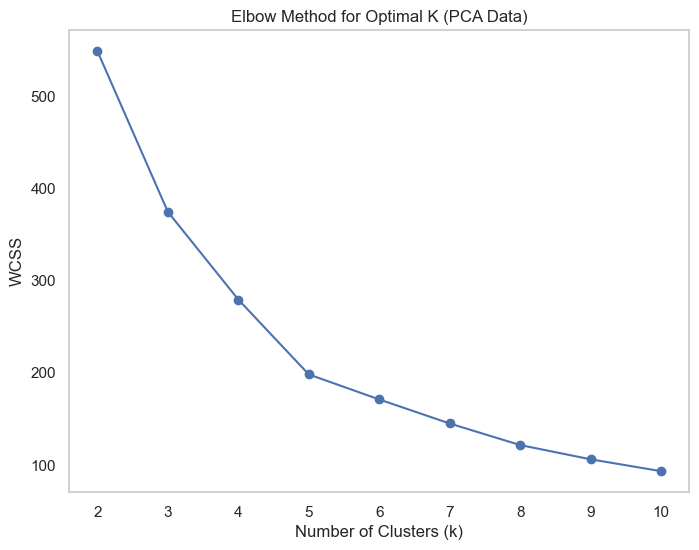

In [921]:
# Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()


### Silhouette

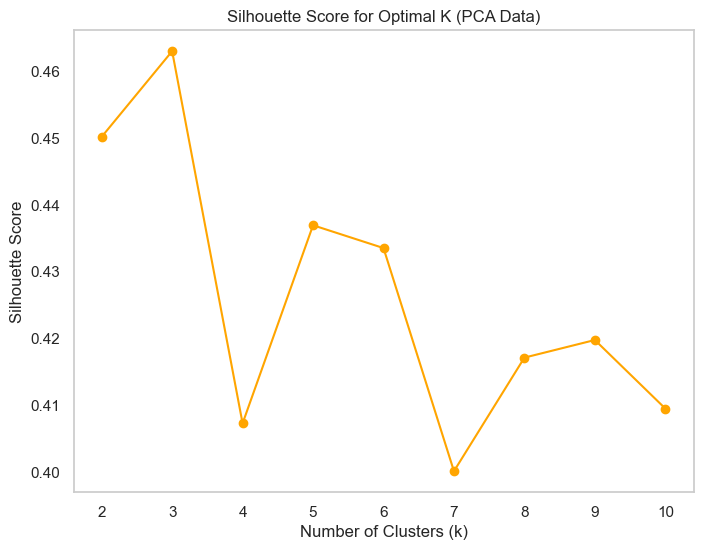

In [922]:

# Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal K (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:


## 5. K-means Clustering Exercise (10 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (7 points).











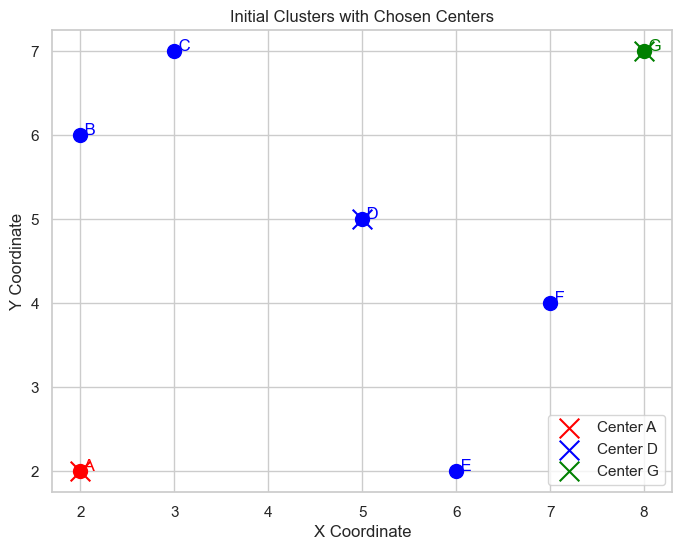

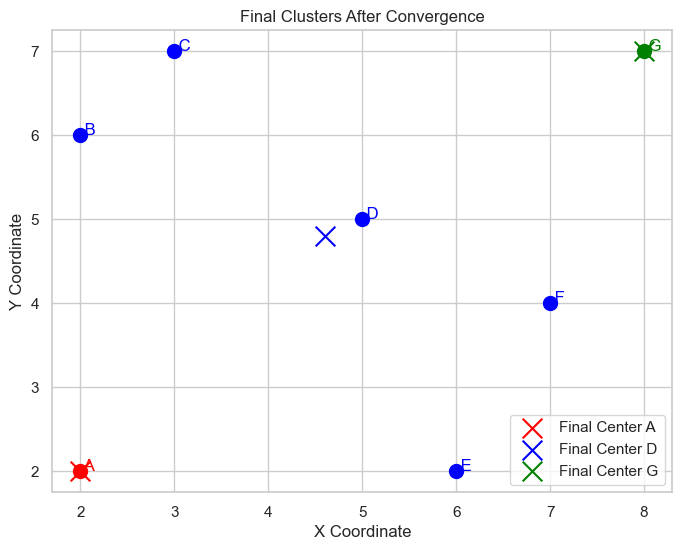

In [923]:
# Given points
points = {
    'A': (2, 2),
    'B': (2, 6),
    'C': (3, 7),
    'D': (5, 5),
    'E': (6, 2),
    'F': (7, 4),
    'G': (8, 7)
}

# Selected initial cluster centers
initial_centers = {'A': points['A'], 'D': points['D'], 'G': points['G']}

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

# Assign points to the nearest cluster center
clusters = {center: [] for center in initial_centers}
for point_label, point in points.items():
    nearest_center = min(initial_centers, key=lambda center: euclidean_distance(point, initial_centers[center]))
    clusters[nearest_center].append(point_label)

# Plotting the initial clusters with different colors for each cluster
plt.figure(figsize=(8, 6))
colors = {'A': 'red', 'D': 'blue', 'G': 'green'}
for center, members in clusters.items():
    center_x, center_y = initial_centers[center]
    # Plot each cluster member
    for member in members:
        member_x, member_y = points[member]
        plt.scatter(member_x, member_y, color=colors[center], s=100)
        plt.text(member_x, member_y, ' ' + member, fontsize=12, color=colors[center], ha='left')
    # Plot the center
    plt.scatter(center_x, center_y, color=colors[center], s=200, marker='x', label=f'Center {center}')

plt.title("Initial Clusters with Chosen Centers")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


def k_means_clustering(points, initial_centers, tolerance=0.001):
    # Function to calculate the mean of points in a cluster
    def calculate_new_center(cluster_points):
        if not cluster_points:
            return (0, 0)
        mean_x = sum(p[0] for p in cluster_points) / len(cluster_points)
        mean_y = sum(p[1] for p in cluster_points) / len(cluster_points)
        return (mean_x, mean_y)

    centers = initial_centers.copy()
    while True:
        # Assign points to the nearest cluster center
        clusters = {center: [] for center in centers}
        for point_label, point in points.items():
            nearest_center = min(centers, key=lambda c: euclidean_distance(point, centers[c]))
            clusters[nearest_center].append(point)

        # Calculate new centers
        new_centers = {}
        for center, cluster_points in clusters.items():
            new_centers[center] = calculate_new_center(cluster_points)

        # Check if centers have stabilized
        if all(euclidean_distance(centers[c], new_centers[c]) < tolerance for c in centers):
            break
        
        centers = new_centers

    return centers, clusters

# Re-running k-means until convergence
final_centers, final_clusters = k_means_clustering(points, initial_centers)

# Plotting the final clusters
plt.figure(figsize=(8, 6))
for center, cluster_points in final_clusters.items():
    # Plot each cluster member
    for point in cluster_points:
        plt.scatter(point[0], point[1], color=colors[center], s=100)
        plt.text(point[0], point[1], ' ' + next(k for k, v in points.items() if v == point), fontsize=12, color=colors[center], ha='left')
    # Plot the new center
    plt.scatter(final_centers[center][0], final_centers[center][1], color=colors[center], s=200, marker='x', label=f'Final Center {center}')

plt.title("Final Clusters After Convergence")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()


**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:

1. 
In the final iteration, every each point is set to the color of the closest centroid, and therefore K-MEAN algorithm has done its job, and every point has grouped together to specific Centroid.

2.
 Yes, choosing different initial cluster centers can lead to different final clusters. This is happening because
K-Means converges to a local minimum, which means the final clusters are influenced by the starting positions of the centroids.

3. 
- Customer Segmentation: Grouping customers based on purchasing behavior, demographics, or preferences.
- Market Analysis: Identifying geographic regions with similar purchasing trends or economic conditions.
- Anomaly Detection: Detecting outliers in data, such as fraudulent transactions or network intrusions.
- Healthcare: Grouping patients with similar symptoms or medical histories for more targeted treatment.

## 6. Principal Component Analysis (PCA) (10 points)
You are given a dataset with 5 rows and 5 columns as shown below. Perform Principal Component Analysis (PCA) on this dataset.

$\begin{pmatrix}
2 & 0 & 1 & 3 & 4\\
1 & 1 & 0 & 2 & 1\\
3 & 2 & 1 & 0 & 5\\
4 & 3 & 2 & 1 & 2\\
5 & 1 & 3 & 4 & 0\\
\end{pmatrix}$

**Tasks:**
1.   **Code**: Compute the eigenvectors using the PCA package from sklearn. (3 points).
2.   **On paper**: Project the dataset onto (1) A 1-dimensional space (first principal component). (2) A 2-dimensional space (first and second principal components). (7 points).

In [924]:
# 1.
# Compute the eigenvectors using the PCA package from sklearn. 
matrix = np.array([
    [2, 0, 1, 3, 4],
    [1, 1, 0, 2, 1],
    [3, 2, 1, 0, 5],
    [4, 3, 2, 1, 2],
    [5, 1, 3, 4, 0]
])

# Step 1: Apply PCA to compute eigenvectors
pca = PCA(n_components=5)  # We start with all components to examine the eigenvectors
pca.fit(matrix)

# Extract eigenvectors (principal components)
eigenvectors = pca.components_
print("Eigenvectors (Principal Components):\n", eigenvectors)

Eigenvectors (Principal Components):
 [[ 0.36816003 -0.05031372  0.32020271  0.47984702 -0.7274227 ]
 [-0.64138932 -0.50697837 -0.36436685  0.40743821 -0.18117277]
 [-0.30637208  0.44922196 -0.29906659 -0.46991222 -0.62775589]
 [-0.41209239  0.68590034  0.24825357  0.5115773   0.1907339 ]
 [-0.43519414 -0.26111648  0.78334945 -0.34815531 -0.08703883]]


### 2.
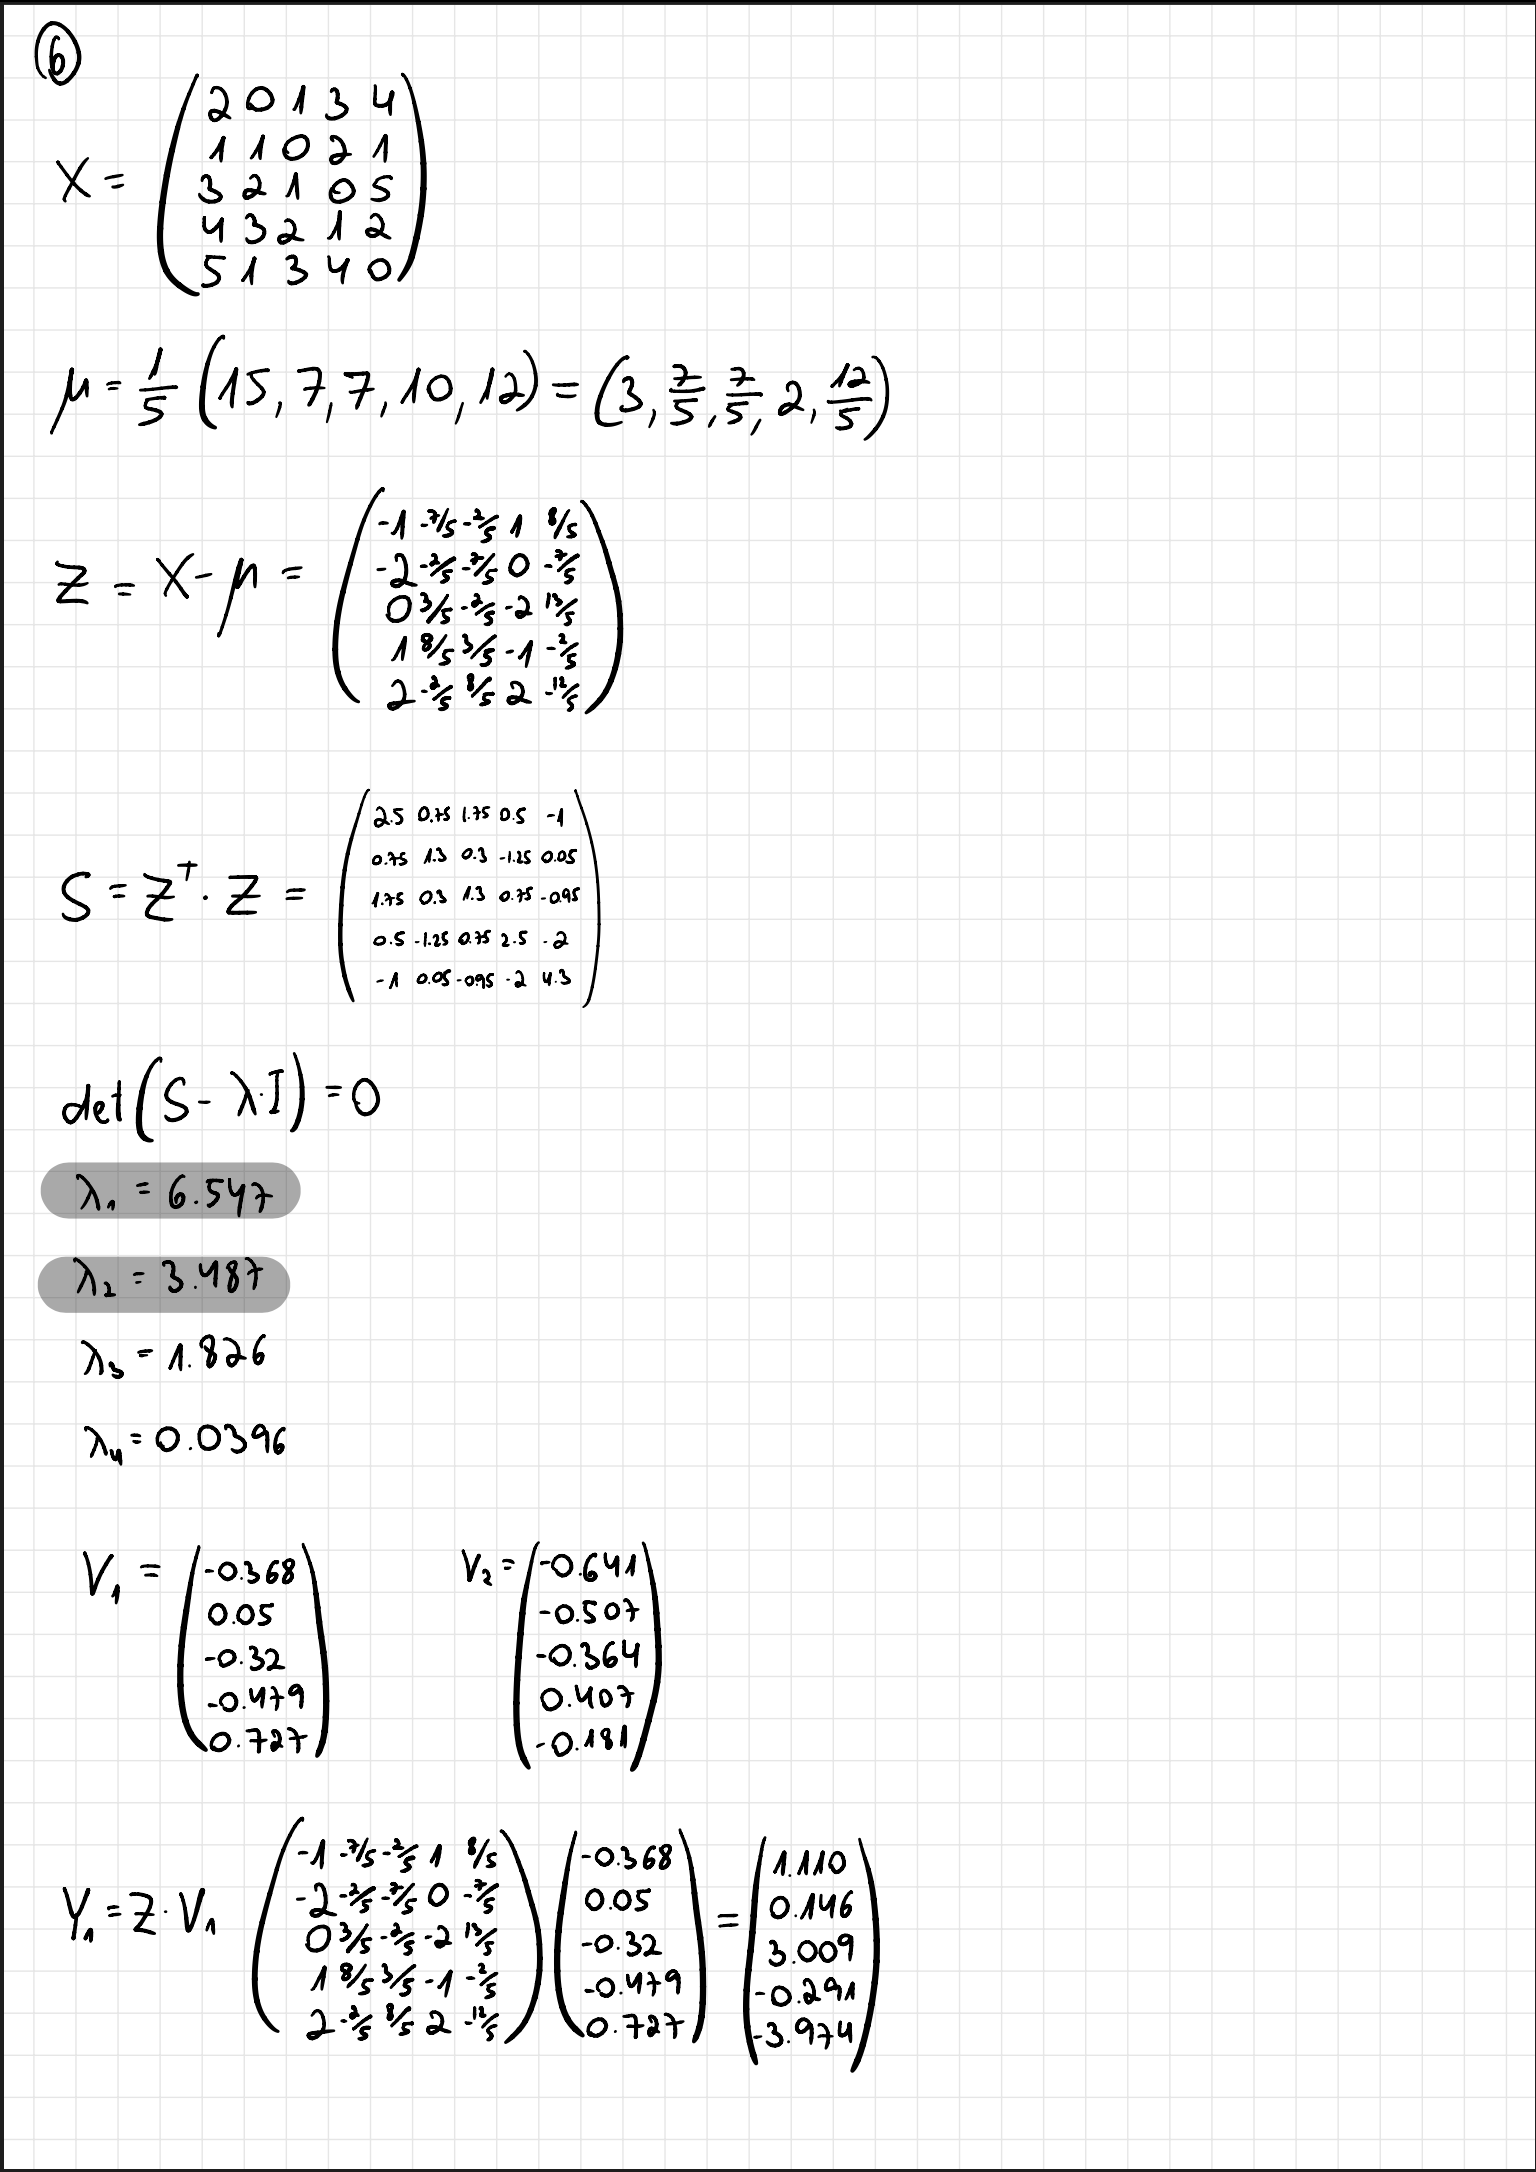
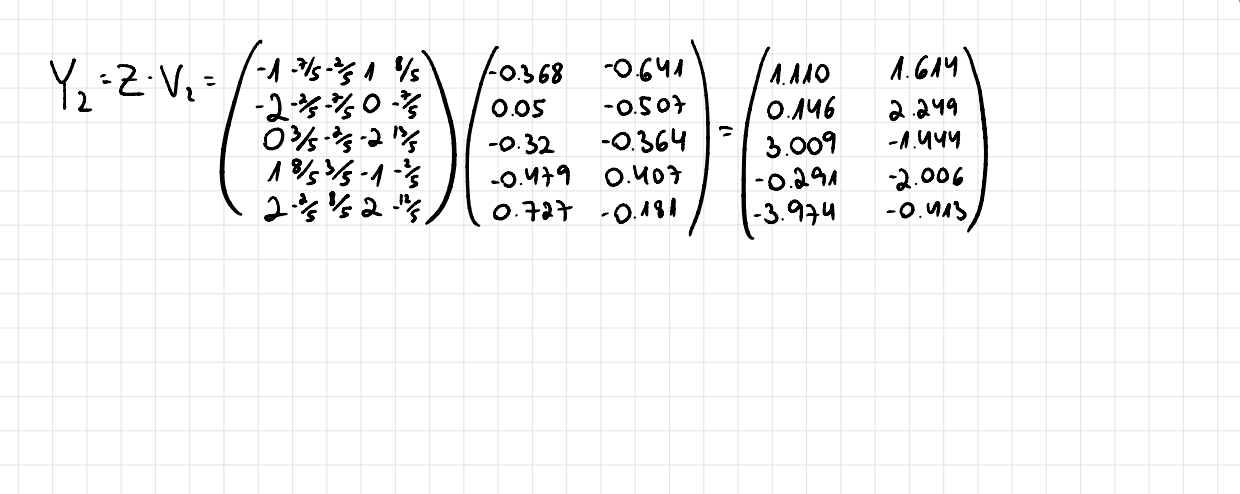